In [1]:
from lib.utils import OptPath, gen_OLS_data, gen_criteria, gen_quadratic_data
import numpy as np
from scipy.stats import ortho_group
import torch
import matplotlib.pyplot as plt
import lib.optimizer as optimizers

In [8]:
lambda_min = 0.001
lambda_max = 100
d = 100
d_pad_zeros = 100 #100
n = 300
x0 = np.random.uniform(2, 10, d + d_pad_zeros) 
optimal = np.random.randn(d + d_pad_zeros)
Q, U, Lambda, X, y = gen_OLS_data(n, d, lambda_min, lambda_max, logscale=True, d_pad_zeros=d_pad_zeros,
                                  theta_star=optimal, noise=0)
# Q, Lambda, X, y = gen_quadratic_data(n, d, lambda_min, lambda_max, logscale=True,
#                                      theta_star=optimal)

criteria, theta_star = gen_criteria(X, y)
X.shape, y.shape

((300, 200), (300, 1))

<class 'lib.optimizer.AdaSGDInf'> 0.4
<class 'lib.optimizer.AdaSGD'> 0.15
<class 'torch.optim.sgd.SGD'> 0.4
<class 'torch.optim.adam.Adam'> 0.2


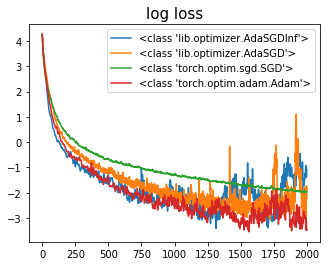

In [23]:
opt_path = OptPath(max_iter=2000, tol=1e-6)
opt_lrs = [(optimizers.AdaSGDInf, 0.4), (optimizers.AdaSGD, 0.15), (torch.optim.SGD, 1/lambda_max*40), 
           (torch.optim.Adam, 0.2)]
for opt, lr in opt_lrs:
    print(opt, lr)
    opt_path.get_path(criteria, x0, record=True, lr=lr, opt=opt)#, amsgrad=True)
    
    plt.gcf().set_size_inches(24, 4)
    plt.subplot(1,4,1)
    plt.plot(np.log([criteria(torch.from_numpy(x).view(1, -1).float(), 
                              bs=len(X)).item() for x in opt_path.x_path]), 
             label=str(opt))
    plt.title('log loss', fontsize=15)
    #plt.show()
    
#     x_star = theta_star.ravel()
#     plt.subplot(1,4,2)
#     error = np.array([Q.dot(x - x_star) for x in opt_path.x_path])
#     for i in range(d):
#         plt.plot(error[:,i], label='error eigenvector {}'.format(d-i))
#     plt.legend()
#     plt.title('error decomposition (small index larger eigenvalue)')
#     #plt.show()
    
#     plt.subplot(1,4,3)
#     error = np.array([Q.dot(x - x_star) for x in opt_path.x_path])
#     for i in range(d):
#         plt.plot(np.log(np.abs(error[:,i])), label='error eigenvector {}'.format(d-i))
#     plt.legend()
#     plt.title('log abs error decomposition')

#     plt.subplot(1,4,4)
#     error = np.array([Q.dot(x - x_star) for x in opt_path.x_path])
#     for i in range(d):
#         plt.plot(np.sign(error[:,i]), label='error eigenvector {}'.format(d-i))
#     plt.legend()
#     plt.title('sign of error decomposition')
#     plt.show()
    
#     print('lr: {}'.format(lr), 'converge time:', opt_path.get_converge_time(), 'distance to solution:', np.linalg.norm(opt_path.x_path[-1]))

plt.legend()
plt.show()

<class 'lib.optimizer.AdaSGD'> 0.01
<class 'lib.optimizer.AdaSGDInf'> 0.01
<class 'lib.optimizer.AdaSGD'> 0.01
<class 'lib.optimizer.AdaSGDInf'> 0.01
<class 'lib.optimizer.AdaSGD'> 0.01
<class 'lib.optimizer.AdaSGDInf'> 0.01


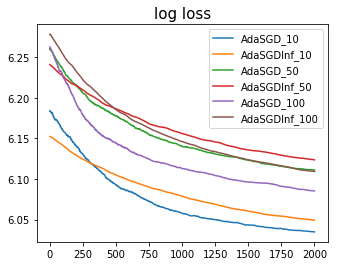

In [7]:
opt_path = OptPath(max_iter=2000, tol=1e-6)
opt_lrs = [(optimizers.AdaSGD, 0.01), (optimizers.AdaSGDInf, 0.01)]

for d_pad_zeros in [10, 50, 100]:
    _, _, _, X, y = gen_OLS_data(n, d, lambda_min, lambda_max, logscale=True, d_pad_zeros=d_pad_zeros, Q=Q, U=U,
                                 theta_star=None, noise=0)
    criteria, theta_star = gen_criteria(X, y)
    
    for opt, lr in opt_lrs:
        print(opt, lr)
        x0 = np.random.uniform(2, 10, d + d_pad_zeros) 
        opt_path.get_path(criteria, x0, record=True, lr=lr, opt=opt)#, amsgrad=True)

        plt.gcf().set_size_inches(24, 4)
        plt.subplot(1,4,1)
        plt.plot(np.log([criteria(torch.from_numpy(x).view(1, -1).float(), bs=len(X)).item() 
                         for x in opt_path.x_path]), 
                 label=str(opt).split('.')[-1].split("'")[0] + "_{}".format(d_pad_zeros))

plt.title('log loss', fontsize=15)
plt.legend()
plt.show()

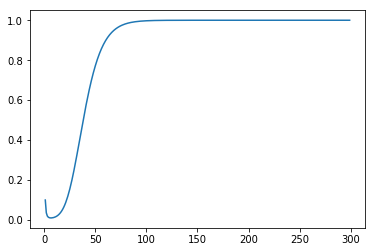

In [31]:
x = np.arange(1, 300)
eps = 0.9
plt.plot(x, (1-eps**x)**x)
plt.show()